In [1]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline 

Здесь мы импортировали 

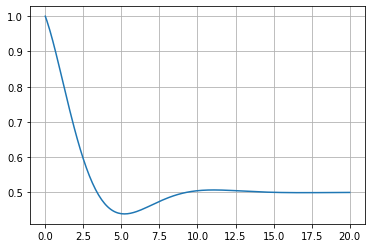

In [21]:
class Model:
    a = 0.5
    b = 0.1
    kp = -12
    ki = -4
    x0 = 1
    xd = 0.5
    dt = 0.1
    tt = np.array([0, dt])
    T = 20
    TT = np.arange(0,T+dt,dt)
    u0 = 0
    xx = np.array([x0])
    ei = 0

    def du(in_,t,ep):
        return ep

    def ctrl(self,x):
        ep = x-self.xd
        self.ei = odeint(Model.du,self.ei,self.tt,args=(ep,))[-1]
        u = self.kp*ep + self.ki*self.ei
        return u

    def rp(in_,t,u,a,b):
        x = in_
        dx = a*x + b*u
        return dx

    def state(self,u,x0):
        x = odeint(Model.rp,x0,self.tt,args=(u,self.a,self.b))[-1]
        return x

    def step(self,x0,u0):
        u = self.ctrl(x0)
        x = self.state(u,x0)
        return (x,u)

    def main_cycle(self):
        x = self.x0
        u = self.u0
        for t in self.TT[1:]:
            (x,u) = self.step(x,u)
            self.xx = np.concatenate((self.xx,x))

    def __init__(self):
        pass

m = Model()
m.main_cycle()
plt.plot(m.TT,m.xx)
plt.grid()